In [1]:
import numpy as np
import scipy as sp
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
import time
from ipywidgets import interact
from os import path
from scipy.integrate import quad, nquad
from scipy.special import gamma
from scipy.optimize import fsolve
from os import path


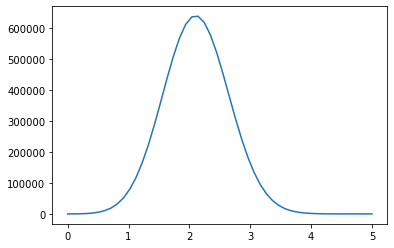

In [180]:
mu=10
beta = 3
r= lambda s: s/(2*pi**2)* np.sinh(2*pi*s)
y= lambda s: np.exp(-beta*s**2/2) * 2**(1-2*mu) * np.abs(gamma(mu-0.5+ 1j*s))**2

dz= lambda x: r(x)*y(x)
zmax= 5
Z1= nquad(dz, [[0, zmax]])[0]

dS_bh= lambda x: -r(x)*y(x)*np.log(y(x))
S_bh= nquad(dS_bh,[[0,zmax]])[0]/Z1 + np.log(Z1)

xplot=np.linspace(0,zmax)
plt.figure()
plt.plot(xplot,dz(xplot))
plt.show()

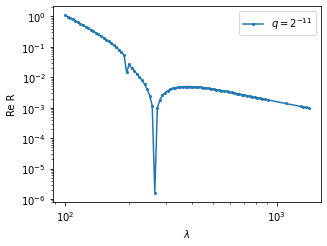

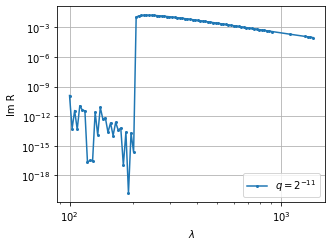

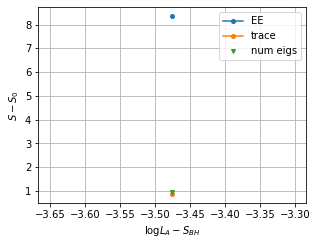

In [186]:

# qlist=2**np.arange(-20,3.1,1) # mu=2
qlist=2**np.arange(-16,0.1,1) # mu=6

# qlist=2**np.concatenate((np.arange(-16,-10.1,1),np.array([0.0])) )
qlist=2**np.array([-11.0])

num_eigs = np.zeros(len(qlist))
tr_rT = np.zeros(len(qlist))
vN_ent = np.zeros(len(qlist))

fig1=plt.figure(1,figsize=(4.8,3.6))
ax1 = fig1.add_subplot()
fig2=plt.figure(2,figsize=(4.8,3.6))
ax2 = fig2.add_subplot()
for i_q in range(len(qlist)):
    q=qlist[i_q]
    if mu==2:
        if np.log2(q)<=-7:
            if  np.log2(q)>-11:
                N_lmbda=100
                if np.log2(q)>=-10:
                    N_lmbda=200
                f1= 'lq_%d_Nl_%d.npz' % (np.log2(q),N_lmbda)                
            else:
                N_lmbda=100            
                f1= 'lq_%d_Nl_%d.npz' % (np.log2(q),N_lmbda)
        else:
            N_lmbda=100
            f1= 'q_%.3f_Nl_%d.npz' % (q,N_lmbda)
    else:
        N_lmbda=100
        f1= 'lq_mu_%.2f_%d_Nl_%d.npz' % (mu,np.log2(q),N_lmbda)

    out_dir = 'canonical_ent/' 
    fname = out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        R_re=npzfile['R_re']
        R_im=npzfile['R_im']
        lmbda_re=npzfile['lmbda_re']
        lmbda_im=npzfile['lmbda_im']
    
#     inds= inds_dict['%d' % (i_q)]
                         
        inds= np.argwhere(np.abs(lmbda_im)<1e-4)
        ax1.loglog(lmbda_re[inds]/(1+q),np.abs(R_re[inds]),'o-',markersize=2,label='$q=2^{%d}$' % np.log2(q))
        ax2.loglog(lmbda_re[inds]/(1+q),np.abs(R_im[inds]),'o-',markersize=2,label='$q=2^{%d}$' % np.log2(q))

        num_eigs[i_q]= np.trapz(np.abs(R_im[inds]),x=lmbda_re[inds],axis=0)/pi
        tr_rT[i_q]= 1/(q*Z1)*np.trapz(np.abs(R_im[inds])*lmbda_re[inds],x=lmbda_re[inds],axis=0)/pi
        vN_ent[i_q]= -1/(q*Z1)*np.trapz(np.abs(R_im[inds])*np.abs(lmbda_re[inds])*np.log(np.abs(lmbda_re[inds])),x=lmbda_re[inds],axis=0)/pi

ax1.set_ylabel('Re R')
ax1.set_xlabel('$\lambda$')
ax1.legend()
ax2.set_ylabel('Im R')
ax2.set_xlabel('$\lambda$')
ax2.legend()
plt.grid()
plt.show()


plt.figure(figsize=(4.8,3.6))
plt.plot(-np.log(qlist)-S_bh,vN_ent+np.log(Z1),'o-',markersize=4,label='EE')
plt.plot(-np.log(qlist)-S_bh,tr_rT,'o-',markersize=4,label='trace')
plt.plot(-np.log(qlist)-S_bh,num_eigs,'v',markersize=4,label='num eigs')
plt.ylabel('$S-S_0$')
# plt.xlabel('$-\log q$')
plt.xlabel('$\log L_A- S_{BH}$')
plt.grid()
plt.legend()
plt.show()


In [171]:
print(vN_ent,np.log(Z1))

[ 6.04806511  5.65467889  5.3341914   4.87681082  4.34496373  3.90327035
 -3.36562448] 5.530476981690063


In [156]:
print(np.log2(np.exp(-3+S_bh)))

10.75507447523236
